In [76]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns

In [77]:
data = pd.read_csv('CrimesOnWomenData.csv')

In [78]:
data

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...,...
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,733,Delhi UT,2021,2,1,0,5,1,9,0
734,734,Lakshadweep,2021,0,0,0,1,1,3,0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


In [80]:
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [81]:
data = data.rename(columns={'K&A': 'Kidnapping and Abduction', 
                        'DD': 'Dowry Deaths', 
                        'AoW': 'Assault against Women', 
                        'AoM': 'Assault against Modesty of Women',
                        'DV':'Domestic Violence',
                        'WT':'Women Trafficking'
})

In [82]:
data

,State,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault against Women,Assault against Modesty of Women,Domestic Violence,Women Trafficking
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0


In [83]:
data['State'] = data['State'].str.lower()

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   State                             736 non-null    object
 1   Year                              736 non-null    int64 
 2   Rape                              736 non-null    int64 
 3   Kidnapping and Abduction          736 non-null    int64 
 4   Dowry Deaths                      736 non-null    int64 
 5   Assault against Women             736 non-null    int64 
 6   Assault against Modesty of Women  736 non-null    int64 
 7   Domestic Violence                 736 non-null    int64 
 8   Women Trafficking                 736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 51.9+ KB


In [85]:
data['State'].unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a & n islands', 'chandigarh', 'd & n haveli',
       'daman & diu', 'lakshadweep', 'puducherry', 'telangana',
       'd&n haveli', 'delhi ut'], dtype=object)

In [86]:
data.describe()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault against Women,Assault against Modesty of Women,Domestic Violence,Women Trafficking
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [87]:
data.select_dtypes(exclude=['object']).corr()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault against Women,Assault against Modesty of Women,Domestic Violence,Women Trafficking
Year,1.000000,0.173887,0.304664,-0.000553,0.238821,0.004101,0.165201,0.208886
Rape,0.173887,1.000000,0.700730,0.553497,0.804336,0.458025,0.680321,0.219218
Kidnapping and Abduction,0.304664,0.700730,1.000000,0.691524,0.671159,0.355703,0.685999,0.179016
Dowry Deaths,-0.000553,0.553497,0.691524,1.000000,0.456012,0.422970,0.487465,0.093254
Assault against Women,0.238821,0.804336,0.671159,0.456012,1.000000,0.521432,0.631558,0.284338
Assault against Modesty of Women,0.004101,0.458025,0.355703,0.422970,0.521432,1.000000,0.419300,0.260077
Domestic Violence,0.165201,0.680321,0.685999,0.487465,0.631558,0.419300,1.000000,0.280839
Women Trafficking,0.208886,0.219218,0.179016,0.093254,0.284338,0.260077,0.280839,1.000000


In [88]:
data.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [89]:
Rape = data.groupby(['State']).agg({
    'Rape': 'sum'
}).sort_values(by = 'Rape', ascending=False)[:15]
Rape

,Rape
State,
madhya pradesh,72808
uttar pradesh,45694
rajasthan,43799
maharashtra,39252
assam,32190
west bengal,29486
chhattisgarh,25178
odisha,24810
kerala,24184


In [90]:
data.groupby(['Year']).agg({
    'Rape': 'sum'
}).sort_values(by = 'Rape', ascending=False)[:15]

,Rape
Year,
2016,38947
2014,36735
2015,34651
2013,33707
2018,33356
2017,32559
2019,32033
2021,31677
2020,28046


In [91]:
K_A = data.groupby(['State']).agg({
    'Kidnapping and Abduction': 'sum'
}).sort_values(by = 'Kidnapping and Abduction', ascending=False)[:15]
K_A

,Kidnapping and Abduction
State,
uttar pradesh,133856
bihar,77687
assam,71462
madhya pradesh,57485
rajasthan,55320
west bengal,51742
maharashtra,46522
delhi ut,31251
odisha,29847


In [92]:
data.groupby(['Year']).agg({
    'Kidnapping and Abduction': 'sum'
}).sort_values(by = 'Kidnapping and Abduction', ascending=False)[:15]

,Kidnapping and Abduction
Year,
2021,75369
2019,72780
2018,72751
2017,66333
2016,64519
2020,62300
2015,59277
2014,57311
2013,51881


In [93]:
DD = data.groupby(['State']).agg({
    'Dowry Deaths': 'sum'
}).sort_values(by = 'Dowry Deaths', ascending=False)[:15]
DD

,Dowry Deaths
State,
uttar pradesh,40615
bihar,24428
madhya pradesh,13316
andhra pradesh,8165
west bengal,8075
rajasthan,7769
odisha,7521
jharkhand,6814
karnataka,6028


In [94]:
data.groupby(['Year']).agg({
    'Dowry Deaths': 'sum'
}).sort_values(by = 'Dowry Deaths', ascending=False)[:15]

,Dowry Deaths
Year,
2014,10050
2011,8618
2010,8248
2009,8242
2012,8233
2013,8083
2008,8043
2007,7955
2015,7634


In [95]:
AoW = data.groupby(['State']).agg({
    'Assault against Women': 'sum'
}).sort_values(by = 'Assault against Women', ascending=False)[:15]
AoW

,Assault against Women
State,
madhya pradesh,152000
maharashtra,107519
uttar pradesh,99650
andhra pradesh,92084
odisha,83473
kerala,69081
rajasthan,67855
karnataka,64492
west bengal,51014


In [96]:
data.groupby(['Year']).agg({
    'Assault against Women': 'sum'
}).sort_values(by = 'Assault against Women', ascending=False)[:15]

,Assault against Women
Year,
2021,89200
2018,89097
2019,88367
2017,86001
2020,85392
2016,84746
2015,82422
2014,82235
2013,70739


In [97]:
AoM = data.groupby(['State']).agg({
    'Assault against Modesty of Women': 'sum'
}).sort_values(by = 'Assault against Modesty of Women', ascending=False)[:15]
AoM

,Assault against Modesty of Women
State,
andhra pradesh,54684
uttar pradesh,46524
maharashtra,30693
madhya pradesh,21631
tamil nadu,12084
haryana,11834
kerala,8873
odisha,7631
delhi ut,6046


In [98]:
data.groupby(['Year']).agg({
    'Assault against Modesty of Women': 'sum'
}).sort_values(by = 'Assault against Modesty of Women', ascending=False)[:15]


,Assault against Modesty of Women
Year,
2016,27344
2015,24041
2014,21938
2013,12589
2003,12220
2008,12084
2009,10891
2007,10783
2002,10027


In [99]:
DV = data.groupby(['State']).agg({
    'Domestic Violence': 'sum'
}).sort_values(by = 'Domestic Violence', ascending=False)[:15]
DV

,Domestic Violence
State,
west bengal,262235
rajasthan,201488
andhra pradesh,188511
uttar pradesh,163062
assam,135415
maharashtra,133357
gujarat,96480
madhya pradesh,95521
kerala,84277


In [100]:
data.groupby(['Year']).agg({
    'Domestic Violence': 'sum'
}).sort_values(by = 'Domestic Violence', ascending=False)[:15]

,Domestic Violence
Year,
2021,136234
2019,125298
2014,122877
2013,118866
2015,113403
2020,111549
2016,110378
2012,106527
2017,104551


In [101]:
WT = data.groupby(['State']).agg({
    'Women Trafficking': 'sum'
}).sort_values(by = 'Women Trafficking', ascending=False)[:15]
WT

,Women Trafficking
State,
tamil nadu,4041
karnataka,2799
andhra pradesh,2548
maharashtra,2533
kerala,990
west bengal,940
telangana,866
bihar,825
rajasthan,668


In [102]:
data.groupby(['Year']).agg({
    'Women Trafficking': 'sum'
}).sort_values(by = 'Women Trafficking', ascending=False)[:15]

,Women Trafficking
Year,
2013,2579
2012,2563
2011,2435
2015,2424
2016,2214
2014,2070
2017,1536
2018,1459
2019,1185


c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


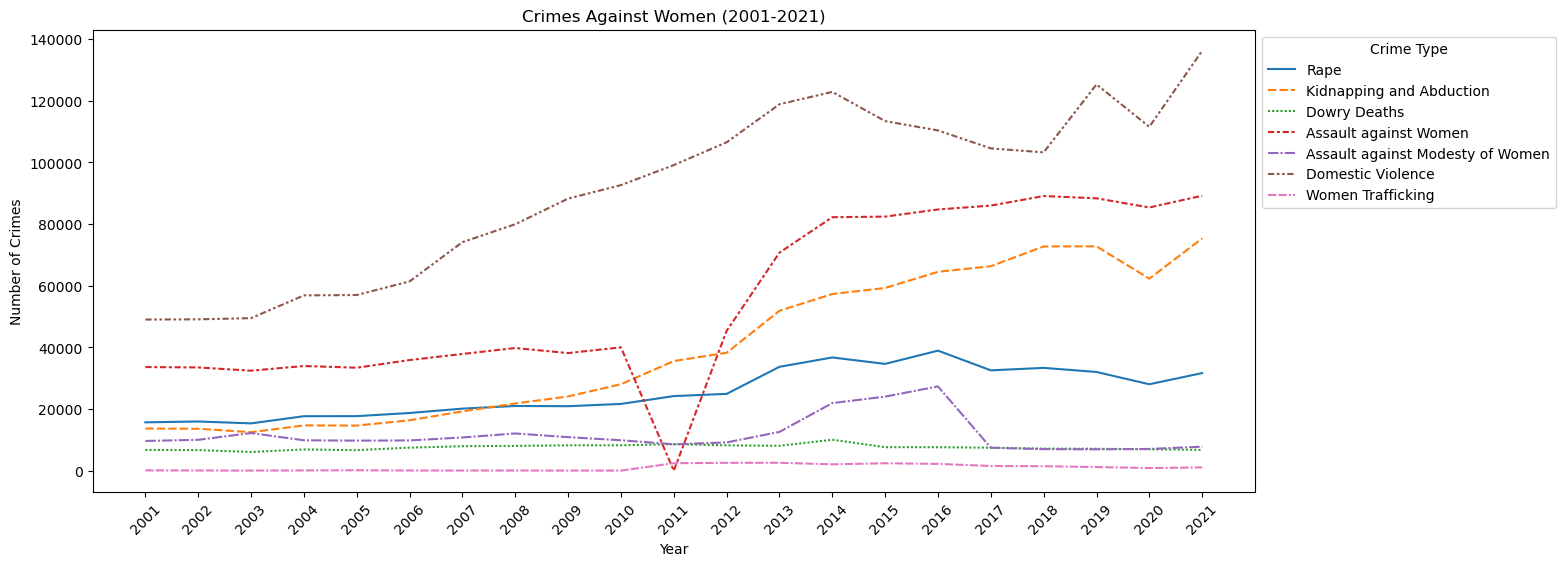

In [103]:
crime = data.groupby('Year').sum()

plt.figure(figsize=(15, 6))
sns.lineplot(data=crime)
plt.title('Crimes Against Women (2001-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
years = list(range(2001, 2022, 1)) 
plt.xticks(ticks=years, rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

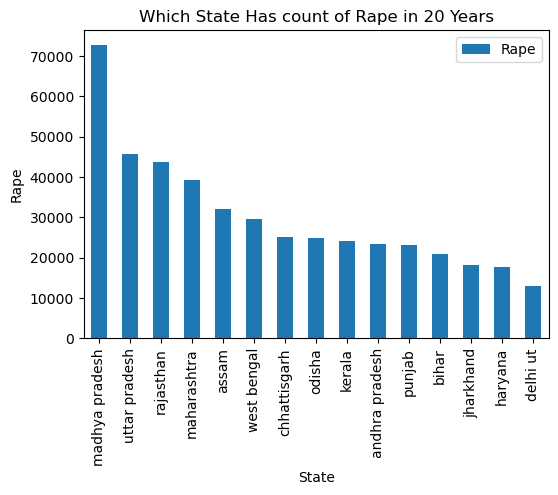

In [104]:
Rape.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Rape in 20 Years')
plt.xlabel('State')
plt.ylabel('Rape')

plt.show()

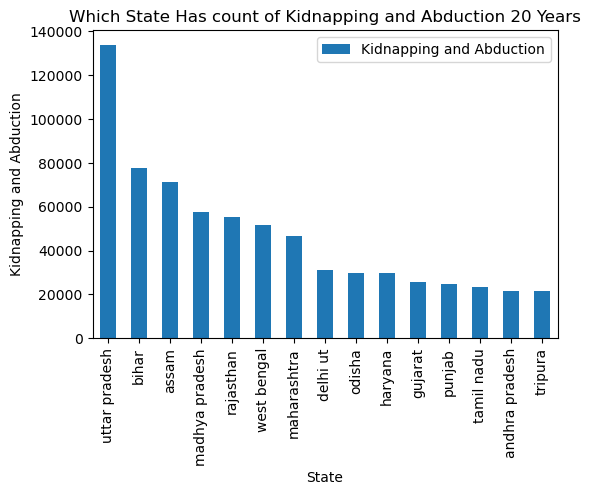

In [105]:
K_A.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Kidnapping and Abduction 20 Years')
plt.xlabel('State')
plt.ylabel('Kidnapping and Abduction')

plt.show()

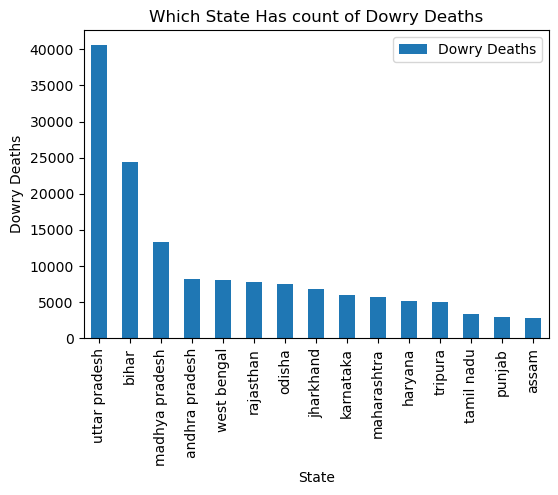

In [106]:
DD.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Dowry Deaths')
plt.xlabel('State')
plt.ylabel('Dowry Deaths')

plt.show()

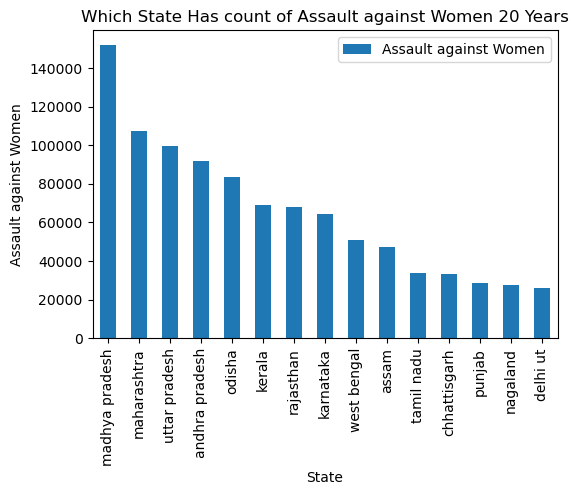

In [107]:
AoW.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Assault against Women 20 Years')
plt.xlabel('State')
plt.ylabel('Assault against Women')

plt.show()

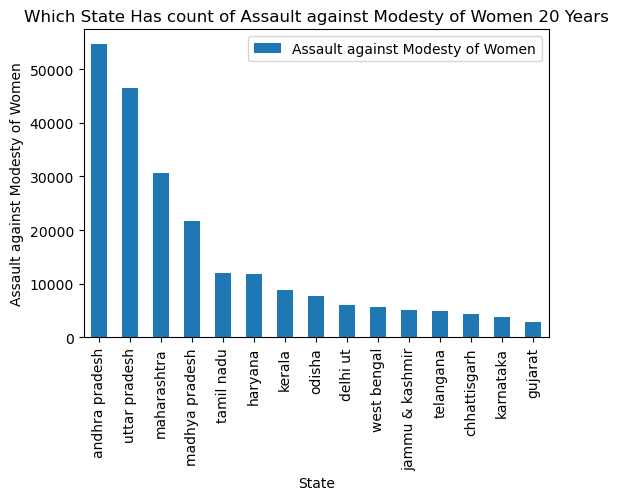

In [108]:
AoM.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Assault against Modesty of Women 20 Years')
plt.xlabel('State')
plt.ylabel('Assault against Modesty of Women')

plt.show()

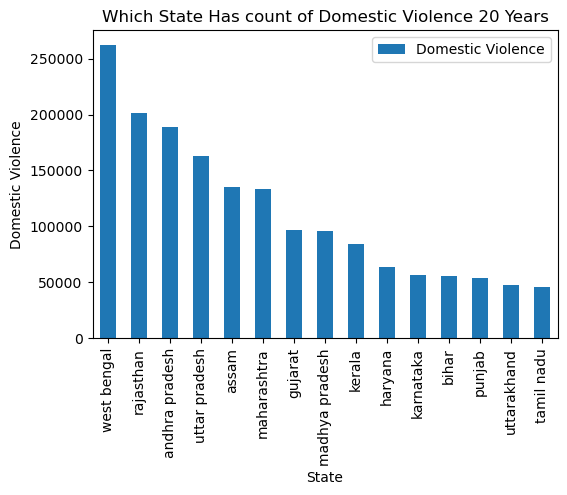

In [109]:
DV.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Domestic Violence 20 Years')
plt.xlabel('State')
plt.ylabel('Domestic Violence')

plt.show()

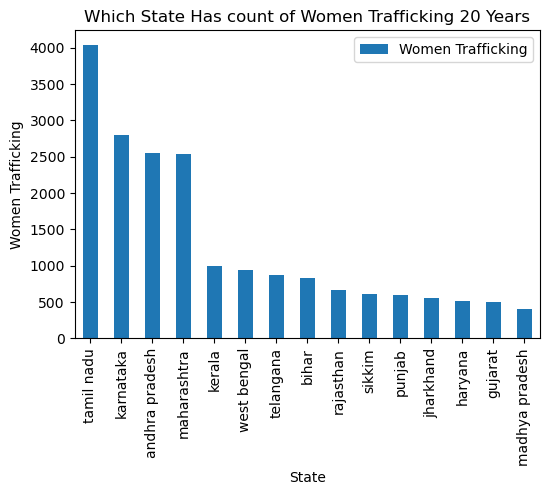

In [110]:
WT.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Women Trafficking 20 Years')
plt.xlabel('State')
plt.ylabel('Women Trafficking')

plt.show()

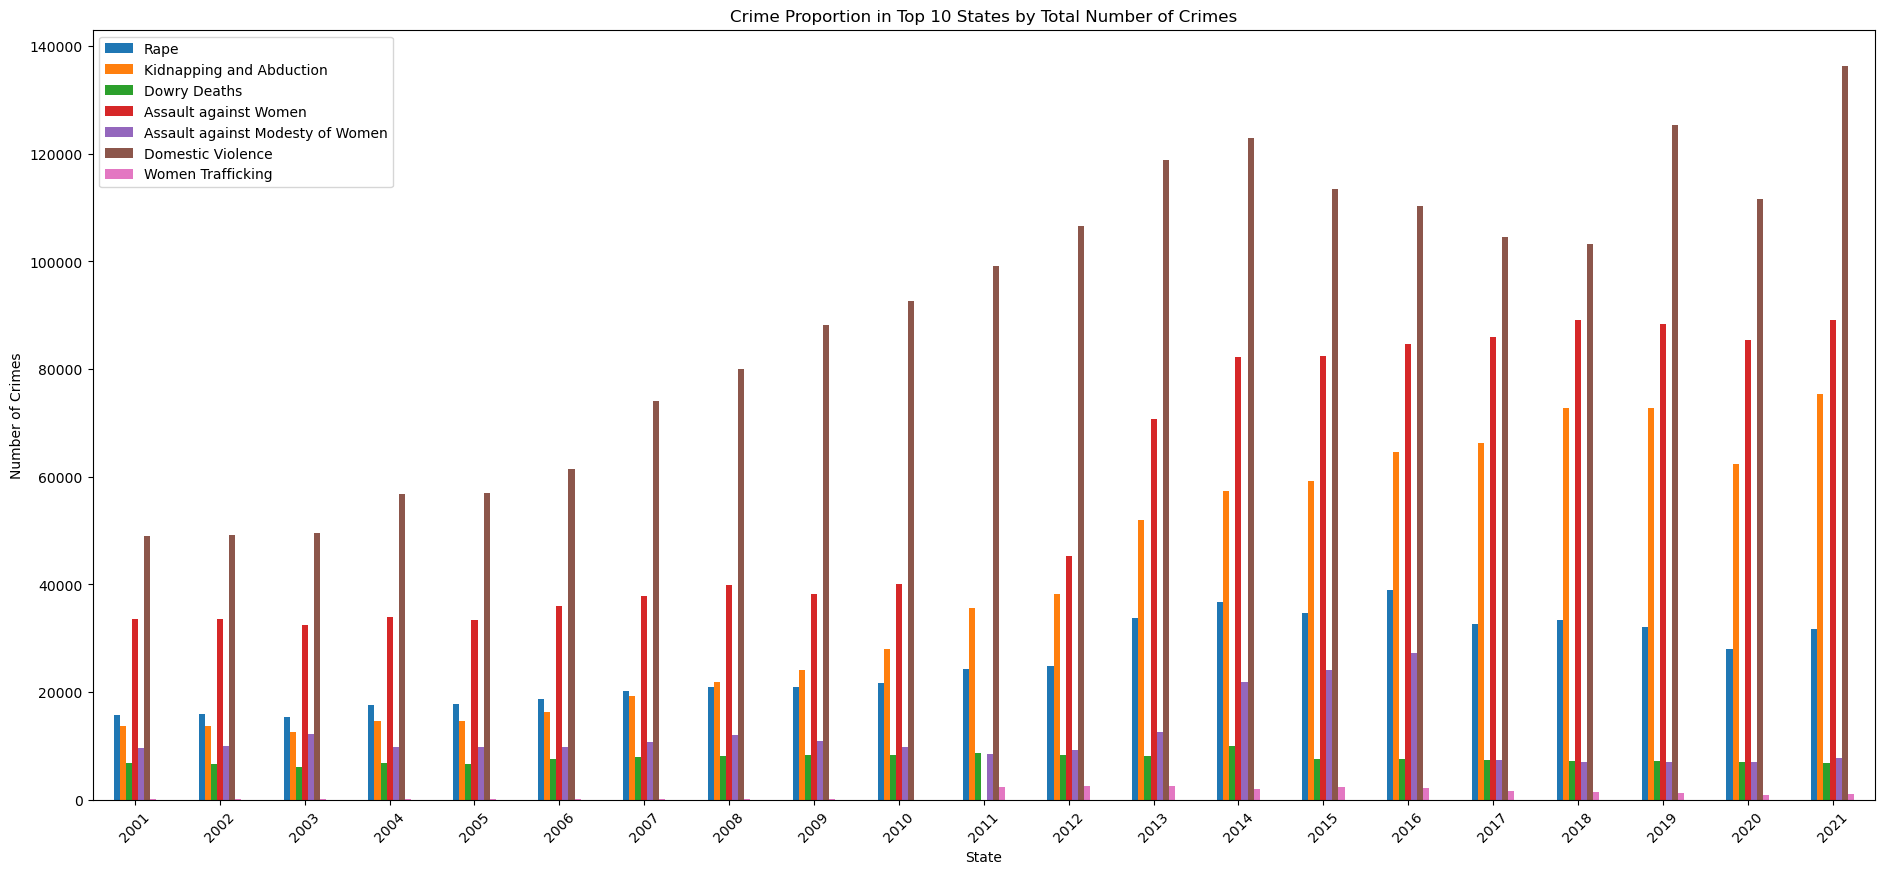

In [111]:
data.groupby(['Year']).agg({
    'Rape': 'sum',
    'Kidnapping and Abduction': 'sum',
    'Dowry Deaths': 'sum',
    'Assault against Women': 'sum',
    'Assault against Modesty of Women': 'sum',
    'Domestic Violence': 'sum',
    'Women Trafficking': 'sum'
}).plot(kind = 'bar', figsize=(23, 10))
plt.title('Crime Proportion in Top 10 States by Total Number of Crimes')
plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)

plt.show()